Imports and neccessary functions from previous labs

In [5]:
# Imports
import matplotlib.pyplot as plt
import multiprocessing
import pandas as pd
import numpy as np
import string
import timeit
import time
import re

from multiprocessing import Pool
from nltk.tokenize import word_tokenize
from ordered_set import OrderedSet
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [6]:
# Functions from hand on 1
def get_and_clean_data():
    data = pd.read_csv('../Week 1/resource/software_developer_united_states_1971_20191023_1.csv')
    description = data['job_description']
    cleaned_description = description.apply(lambda s: s.translate(str.maketrans('', '', string.punctuation + u'\xa0')))
    cleaned_description = cleaned_description.apply(lambda s: s.lower())
    cleaned_description = cleaned_description.apply(lambda s: s.translate(str.maketrans(string.whitespace, ' '*len(string.whitespace), '')))
    cleaned_description = cleaned_description.drop_duplicates()
    return cleaned_description

def simple_tokenize(data):
    cleaned_description = data.apply(lambda s: [x.strip() for x in s.split()])
    return cleaned_description

def parse_job_description():
    cleaned_description = get_and_clean_data()
    cleaned_description = simple_tokenize(cleaned_description)
    return cleaned_description

In [7]:
# Remove the limit <<
cleaned_description = get_and_clean_data()

# Replace non alphabets with spaces, and collapse spaces
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

# Tokenize
tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

# Remove stop words
stop_dict = set(stopwords.words())
sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word)>2])

# Create stem caches
concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
stem_cache = {}
ps = PorterStemmer()
for s in concated:
    stem_cache[s] = ps.stem(s)

# Stem
stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])

In [8]:
stemmed_description

0       [chosen, softwar, develop, part, larger, engin...
1       [posit, lead, softwar, develop, locat, middlet...
2       [senior, softwar, develop, hoboken, start, mon...
3       [client, multin, publish, educ, compani, seek,...
4       [posit, lead, softwar, develop, locat, philade...
                              ...                        
9991    [posit, descript, cgi, experienc, programm, an...
9994    [job, descript, research, design, develop, and...
9997    [job, descript, candid, experienc, microsoft, ...
9998    [appli, sponsorship, work, unit, state, futur,...
9999    [compani, inform, solid, reput, passion, endle...
Name: job_description, Length: 7583, dtype: object

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer=lambda s: s)
vectorizer = cv.fit(stemmed_description)
X = vectorizer.transform(stemmed_description)
print(pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out()).head(10).to_markdown())

|    |   aa |   aaa |   aaacad |   aac |   aachen |   aad |   aadairstrategicstaffcom |   aae |   aaeeo |   aaeoe |   aaeoohsuedu |   aaf |   aah |   aamfdv |   aamfveterandis |   aampt |   aanalyz |   aapeeo |   aar |   aaron |   aarp |   aasa |   aastat |   aau |   aaudiovideo |   ab |   aba |   abacusnext |   abafadc |   abap |   abapworkflow |   abat |   abb |   abbott |   abbrevi |   abbtech |   abc |   abca |   abcmous |   abcmousecom |   abcoa |   abd |   abe |   abeeb |   abend |   abercrombi |   aberdeen |   abet |   abetaccredit |   abf |   abfc |   abhishek |   abi |   abid |   abil |   abilen |   abilities |   abilitiesabout |   abilitiesadv |   abilitiesbusi |   abilitiescombin |   abilitiesdemonstr |   abilitiesemail |   abilitiesprimari |   abilitiesrequir |   abilitiy |   ability |   abilitydesir |   abilityeduc |   abilityor |   abilityto |   abilitywork |   abingdon |   abinitio |   abintio |   abiom |   abl |   ablewil |   abloy |   abnorm |   aboard |   aboettcherap

---
**Page 70** : Quick exercise
- Create an equivalent frequency table (producing the same output as
CountVectorizer) by modifying the code used to generate the binary table in
the previous chapter.
- Then show that the two tables are equivalent.


In [10]:
# Extract Columns from the new code
all_terms = [[term] for term in cv.get_feature_names_out()]

# Old code
# Modified query_map creation: Check if each term is in the document (without splitting)
query_map = pd.DataFrame(
    [
        [1 if np.all([term in doc for term in comb]) else 0 for comb in all_terms]  # Check if term exists in doc
        for doc in stemmed_description  # Iterate over each document (already tokenized)
    ],
    columns=[' '.join(comb) for comb in all_terms]
)


In [ ]:
# Showing the table
print(query_map.head(10).to_markdown())

|    |   aa |   aaa |   aadairstrategicstaffcom |   aaeeo |   aampt |   aapeeo |   aau |   ab |   abap |   abapworkflow |   abc |   aberdeen |   abet |   abid |   abil |   abreast |   abroad |   absenc |   absolut |   absorb |   abstract |   abus |   academ |   academi |   academia |   acap |   acatalyst |   acceler |   acceleromet |   accelri |   accentur |   accept |   acceptancereject |   acceptedmetapro |   accesibilityflextronicscom |   access |   accesscontrol |   accid |   accident |   accolad |   accolit |   accommod |   accommodationaerotek |   accommodationteksystem |   accomplish |   accord |   account |   accredit |   accrual |   accumul |   accumulo |   accur |   accuraci |   accurev |   ace |   acet |   acfr |   ach |   achiev |   aci |   acknowledg |   acm |   acoust |   acqu |   acquir |   acquisit |   acr |   acrobat |   act |   action |   actionequ |   actionori |   actipro |   activ |   activatecr |   activemq |   activex |   actix |   actor |   actorusecas |   actua

---
- Page 74, 75 (Hand_out 2) : Activity — performance benchmark 
    - `Set operations vs list operation in stemming`

In [ ]:
# (Given)
def set_operation(sample_size):
    cleaned_description = get_and_clean_data()[:sample_size]

    #replace non alphabets with spaces, and collapse spaces
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    #tokenize
    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

    #remove stop words
    stop_dict = set(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word)>2])

    #create stem caches
    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)

    #stem
    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])

    return stemmed_description

def list_operation(sample_size):
    cleaned_description = get_and_clean_data()[:sample_size]

    #replace non alphabets with spaces, and collapse spaces
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    #tokenize
    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

    #remove stop words
    stop_dict = list(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: [word for word in s if word not in stop_dict])
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word)>2])

    #create stem caches
    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)

    #stem
    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])

    return stemmed_description


In [ ]:
# Setting up for the full size data iteration <<
data = get_and_clean_data()
data_size = len(data)
iteration_size = 500
# Benchmark
t_set = []
t_list = []
for i in range(iteration_size, data_size+1, iteration_size):
    t_set.append(timeit.timeit(lambda: set_operation(i), number=1))
    t_list.append(timeit.timeit(lambda: list_operation(i), number=1))

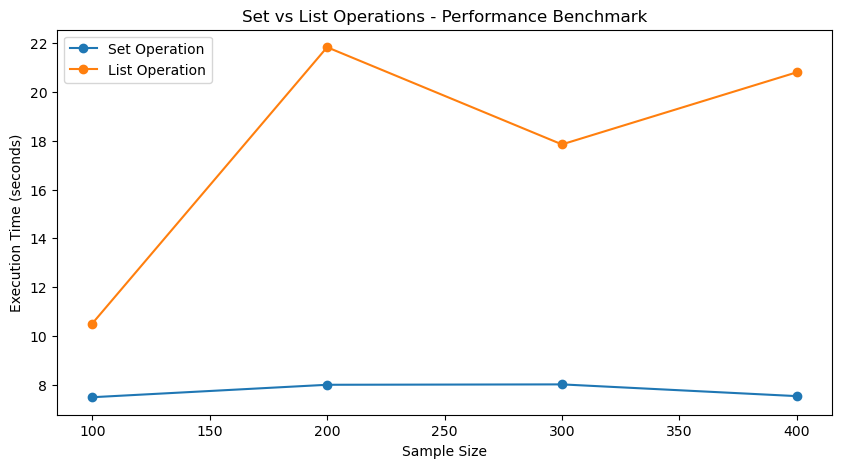

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(range(iteration_size, data_size+1, iteration_size), t_set, label='Set Operation', marker='o')
plt.plot(range(iteration_size, data_size+1, iteration_size), t_list, label='List Operation', marker='o')

plt.xlabel('Sample Size')
plt.ylabel('Execution Time (seconds)')
plt.title('Set vs List Operations - Performance Benchmark')
plt.legend()

plt.show()

---
- Page 76 `handout 2` : Multiprocessing

In [ ]:
def better_set_operation(cleaned_description):
    #replace non alphabets with spaces, and collapse spaces
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'[^A-Za-z]', ' ', s))
    cleaned_description = cleaned_description.apply(lambda s: re.sub(r'\s+', ' ', s))

    #tokenize
    tokenized_description = cleaned_description.apply(lambda s: word_tokenize(s))

    #remove stop words
    stop_dict = set(stopwords.words())
    sw_removed_description = tokenized_description.apply(lambda s: list(OrderedSet(s) - stop_dict))
    sw_removed_description = sw_removed_description.apply(lambda s: [word for word in s if len(word)>2])

    #create stem caches
    concated = np.unique(np.concatenate([s for s in tokenized_description.values]))
    stem_cache = {}
    ps = PorterStemmer()
    for s in concated:
        stem_cache[s] = ps.stem(s)

    #stem
    stemmed_description = sw_removed_description.apply(lambda s: [stem_cache[w] for w in s])

    return stemmed_description

In [ ]:
cleaned_description = get_and_clean_data()

core_exp = {}

for c in [1,2,4,8,12]:
    # 1, 2, 4, 8, ...
    start = time.time()
    print(f"Running: {c} core(s)")
    
    parsed_description_split = np.array_split(cleaned_description, c)
    with multiprocessing.pool.ThreadPool(c) as pool:
        pool.map(better_set_operation, parsed_description_split)
    
    end = time.time()
    core_exp[c] = end - start


Running: 1 core(s)


c:\Users\Admin\anaconda3\envs\SE-IR\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Running: 2 core(s)
Running: 4 core(s)
Running: 8 core(s)
Running: 12 core(s)


In [ ]:
core_exp

{1: 27.136950254440308,
 2: 26.346041917800903,
 4: 21.491621494293213,
 8: 21.90003252029419,
 12: 21.456997394561768}

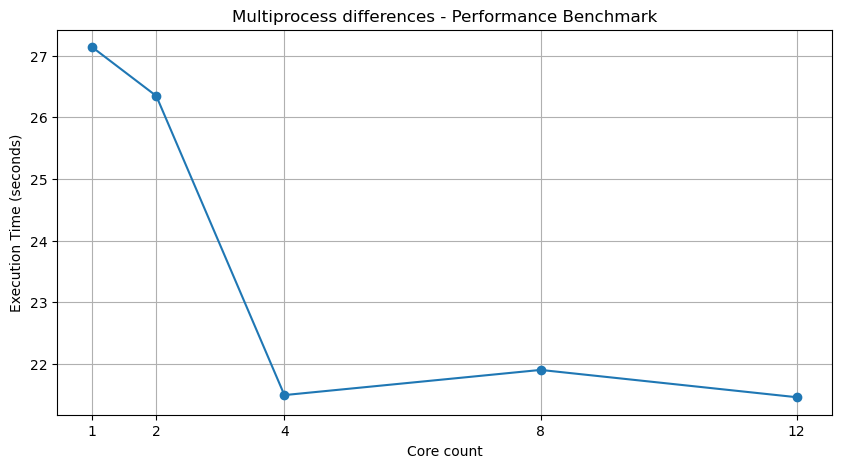

In [ ]:
# Plotting
plt.figure(figsize=(10, 5))
plt.plot(list(core_exp.keys()), list(core_exp.values()), marker='o')

plt.xlabel('Core count')
plt.ylabel('Execution Time (seconds)')
plt.title('Multiprocess differences - Performance Benchmark')
plt.xticks(list(core_exp.keys()))  # Show all core counts on the x-axis
plt.grid(True)
plt.show()

---
- page 78 `handout 2` : speedup time

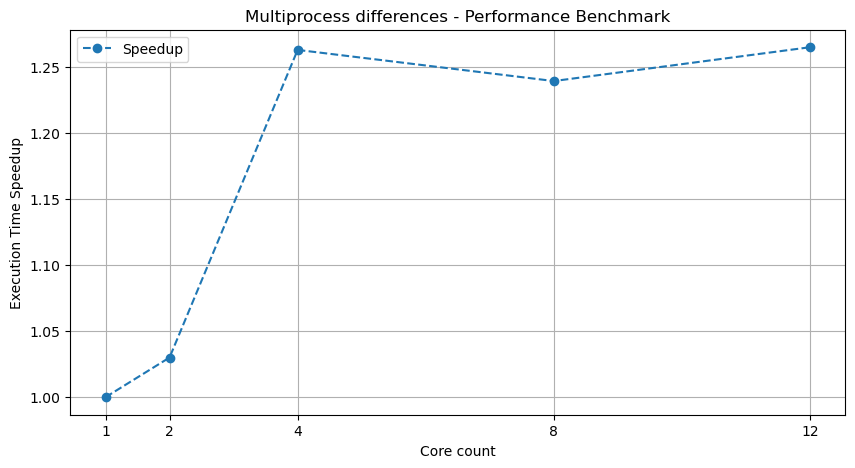

In [ ]:
# Calculate Speedup for each core count
speedup = {c: core_exp[1] / time for c, time in core_exp.items()}

# Plotting
plt.figure(figsize=(10, 5))

plt.plot(list(speedup.keys()), list(speedup.values()), marker='o', linestyle='--', label='Speedup')

plt.xlabel('Core count')
plt.ylabel('Execution Time Speedup')
plt.title('Multiprocess differences - Performance Benchmark')
plt.xticks(list(core_exp.keys()))  # Show all core counts on the x-axis
plt.legend()
plt.grid(True)
plt.show()